In [234]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

In [235]:
recid_df = pd.read_csv('./data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
recid_df.columns = [x.lower() for x in recid_df]

In [236]:
recid_df.dtypes

id                                                     int64
gender                                                object
race                                                  object
age_at_release                                        object
residence_puma                                         int64
gang_affiliated                                       object
supervision_risk_score_first                         float64
supervision_level_first                               object
education_level                                       object
dependents                                            object
prison_offense                                        object
prison_years                                          object
prior_arrest_episodes_felony                          object
prior_arrest_episodes_misd                            object
prior_arrest_episodes_violent                         object
prior_arrest_episodes_property                        object
prior_arrest_episodes_dr

In [237]:
recid_df.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [99]:
recid_df.head()

,id,gender,race,age_at_release,residence_puma,gang_affiliated,supervision_risk_score_first,supervision_level_first,education_level,dependents,...,drugtests_meth_positive,drugtests_other_positive,percent_days_employed,jobs_per_year,employment_exempt,recidivism_within_3years,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,training_sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [113]:
# recid_df_agg = recid_df.groupby(['education_level'])[['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 
#                                        'recidivism_within_3years']].agg({ 'recidivism_arrest_year1': 'sum',
#                                         'recidivism_arrest_year2': 'sum', 'recidivism_arrest_year3': 'sum', 
#                                         'recidivism_within_3years': 'count',})  #recidivism_within_3years

In [127]:
recid_df_agg = recid_df.groupby(['education_level'])[['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years']].sum()

In [128]:
recid_df_agg['percent_year1'] = recid_df_agg['recidivism_arrest_year1']/recid_df_agg['recidivism_within_3years']
recid_df_agg['percent_year2'] = recid_df_agg['recidivism_arrest_year2']/recid_df_agg['recidivism_within_3years']
recid_df_agg['percent_year3'] = recid_df_agg['recidivism_arrest_year3']/recid_df_agg['recidivism_within_3years']

In [238]:
recid_df_agg.head()

,recidivism_arrest_year1,recidivism_arrest_year2,recidivism_arrest_year3,recidivism_within_3years,percent_year1,percent_year2,percent_year3
education_level,,,,,,,
At least some college,1024,668,372,2064,0.496124,0.323643,0.180233
High School Diploma,3575,2127,1180,6882,0.519471,0.309067,0.171462
Less than HS diploma,3125,1772,1061,5958,0.524505,0.297415,0.178080


<AxesSubplot:ylabel='education_level'>

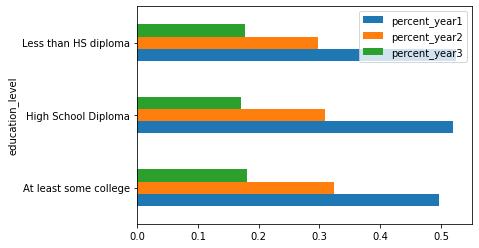

In [239]:
recid_df_agg[['percent_year1', 'percent_year2', 'percent_year3']].plot(kind = 'barh')

In [160]:
recid_df[['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years']].sum()

recidivism_arrest_year1      7724
recidivism_arrest_year2      4567
recidivism_arrest_year3      2613
recidivism_within_3years    14904
dtype: int64

In [165]:
recid_df_sup = recid_df.groupby(['prison_offense'])['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years'].sum()

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_33175/1574314696.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recid_df_sup = recid_df.groupby(['prison_offense'])['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years'].sum()


In [166]:
recid_df_sup['percent_year1'] = recid_df_sup['recidivism_arrest_year1']/recid_df_sup['recidivism_within_3years']

In [167]:
recid_df_sup['percent_year2'] = recid_df_sup['recidivism_arrest_year2']/recid_df_sup['recidivism_within_3years']
recid_df_sup['percent_year3'] = recid_df_sup['recidivism_arrest_year3']/recid_df_sup['recidivism_within_3years']

In [232]:
recid_df_sup = recid_df_sup.drop(['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years'], axis=1)

KeyError: "['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3', 'recidivism_within_3years'] not found in axis"

In [233]:
recid_df_sup.head()

prison_offense,Drug,Other,Property,Violent/Non-Sex,Violent/Sex
percent_year1,0.477175,0.518475,0.554950,0.499154,0.332061
percent_year2,0.326320,0.316716,0.287808,0.308629,0.400763
percent_year3,0.196505,0.164809,0.157242,0.192217,0.267176


In [228]:
recid_df_sup=recid_df_sup.T

In [231]:


recid_df_sup['prison_offense'].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, subplots=True, fontsize=17);


KeyError: 'prison_offense'

In [212]:
import numpy as np
import matplotlib.pyplot as plt


# category_names = ['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3']
# results = {
#     'Drug': [category_names],
#     'Property': [category_names],
#     'Violent/Non-Sex': [category_names],
#     'Violent/Sex': [category_names],
#     'Other': [category_names],
# }


def survey(recid_df_sup):
    # """
    # Parameters
    # ----------
    # results : dict
    #     A mapping from question labels to a list of answers per category.
    #     It is assumed all lists contain the same number of entries and that
    #     it matches the length of *category_names*.
    # category_names : list of str
    #     The category labels.
    # """
    labels = list(recid_df_sup.keys())
    data = recid_df_sup
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn']#(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(recid_df_sup)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left= starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(recid_df_sup)
plt.show();

TypeError: 'function' object is not subscriptable

In [196]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['recidivism_arrest_year1', 'recidivism_arrest_year2', 'recidivism_arrest_year3']
results = {
    'Drug': [0.477175, 0.326320, 0.196505],
    'Property': [0.554950, 0.287808, 0.157242],
    'Violent/Non-Sex': [0.499154, 0.308629, 0.192217],
    'Violent/Sex': [0.332061, 0.400763, 0.267176],
    'Other': [0.518475, 0.316716, 0.164809],
}


def survey(results, category_names):
    # """
    # Parameters
    # ----------
    # results : dict
    #     A mapping from question labels to a list of answers per category.
    #     It is assumed all lists contain the same number of entries and that
    #     it matches the length of *category_names*.
    # category_names : list of str
    #     The category labels.
    # """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn']#(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left= starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show();

TypeError: 'function' object is not subscriptable

In [191]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show();

TypeError: 'function' object is not subscriptable

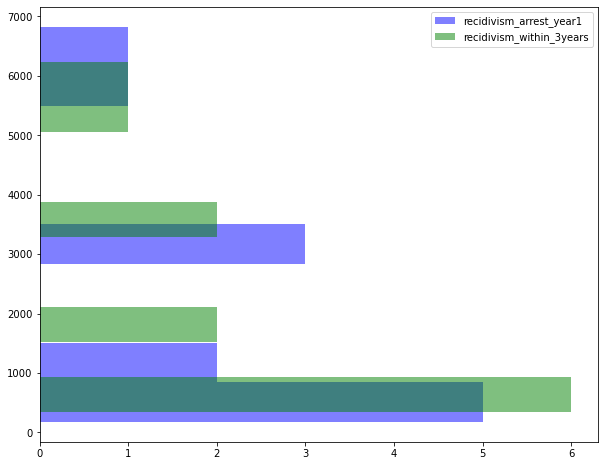

In [97]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.legend(['recidivism_arrest_year1','recidivism_within_3years'])

plt.barh(recid_df.groupby(['gender', 'education_level'])['recidivism_arrest_year1'].value_counts(), 
         orientation='horizontal', color = "blue", 
         alpha = .5, label = 'recidivism_arrest_year1')
plt.hist(recid_df.groupby(['gender', 'education_level'])['recidivism_within_3years'].value_counts(), 
         orientation='horizontal', color = "green", 
         alpha = .5, label = 'recidivism_within_3years')

ax.legend()

In [80]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

recid_df.groupby(['gender', 'education_level'])['recidivism_within_3years'].sum().unstack().plot(kind='barh',
                color='blue', recid_df.groupby(['gender', 'education_level'])['recidivism_arrest_year1'].sum().unstack().plot(kind='barh',
                                                                                                 color='green');

SyntaxError: positional argument follows keyword argument (1907757021.py, line 6)

NameError: name 'h' is not defined

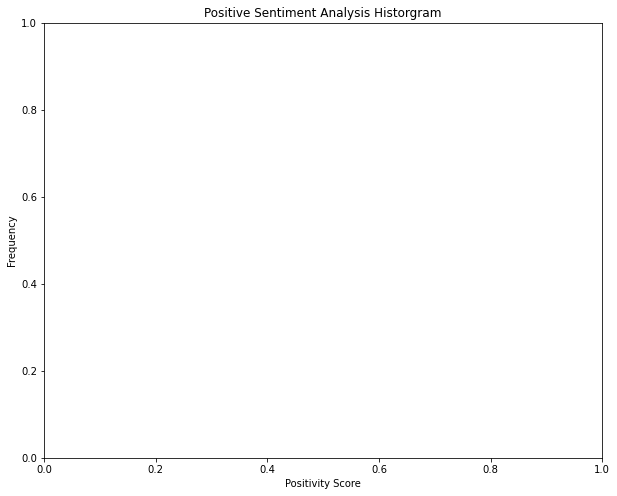

In [89]:
#Positive Sentiment Analysis Historgram and Saving Plot
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('Positive Sentiment Analysis Historgram')
plt.ylabel('Frequency')
plt.xlabel('Positivity Score')

plt.bar(recid_df.groupby(['gender', 'education_level'])['recidivism_within_3years'].sum().unstack(), 
         cmap = 'purples', height = h, alpha = .5, label = 'Dad Jokes')
plt.bar(recid_df.groupby(['gender', 'education_level'])['recidivism_arrest_year1'].sum().unstack(), 
         cmap = 'oranges', height = h, alpha = .5, label = 'Poker')

ax.legend()
plt.savefig('./visuals/pos_his.jpeg', dpi=300, bbox_inches = "tight")
plt.show()

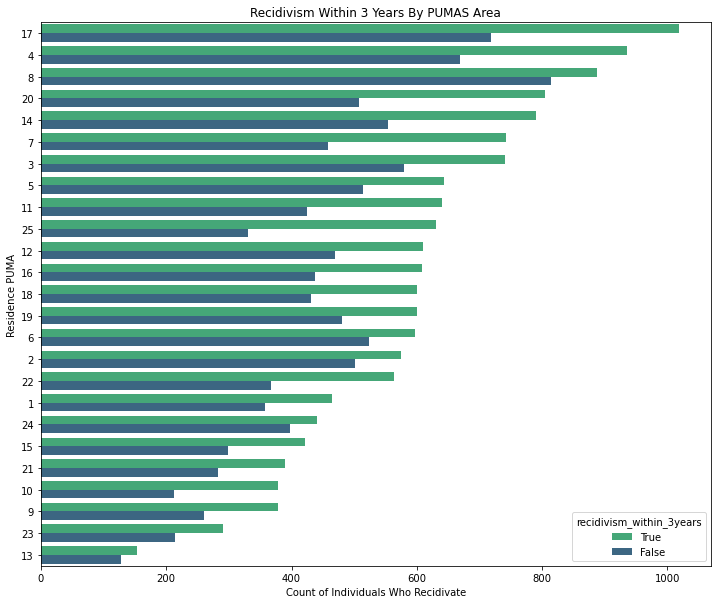

In [73]:
plt.figure(figsize = (12,10))
sns.countplot(data=recid_df,
              y='residence_puma',
              hue='recidivism_within_3years',
              hue_order =[True, False],
              orient='h',
              palette='viridis_r',
              order=recid_df[recid_df['recidivism_within_3years'] == True].groupby('residence_puma').count().sort_values('recidivism_within_3years', ascending=False).index);

plt.title('Recidivism Within 3 Years By PUMAS Area')
plt.ylabel('Residence PUMA')
plt.xlabel('Count of Individuals Who Recidivate');


In [27]:
# recid_df['recidivism_within_3years'] = recid_df['recidivism_within_3years'].astype(int)
# recid_df['recidivism_arrest_year1'] = recid_df['recidivism_arrest_year1'].astype(int)
# recid_df['recidivism_arrest_year2'] = recid_df['recidivism_arrest_year2'].astype(int)
# recid_df['recidivism_arrest_year3'] = recid_df['recidivism_arrest_year3'].astype(int)

In [57]:
# sns.pairhist(recid_df[['residence_puma', 'supervision_risk_score_first', 'avg_days_per_drugtest', 'drugtests_thc_positive', 
#                       'drugtests_cocaine_positive', 'drugtests_meth_positive', 'drugtests_other_positive', 
#                       'percent_days_employed', 'jobs_per_year', 'recidivism_within_3years', 'recidivism_arrest_year1', 'recidivism_arrest_year2', 
#                       'recidivism_arrest_year3']]);

In [173]:
recid_df.corr()['recidivism_within_3years'].sort_values(ascending = False).head(10)

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_33175/4114808076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  recid_df.corr()['recidivism_within_3years'].sort_values(ascending = False).head(10)


recidivism_within_3years                        1.000000
recidivism_arrest_year1                         0.559279
recidivism_arrest_year2                         0.396854
recidivism_arrest_year3                         0.287275
supervision_risk_score_first                    0.178494
drugtests_thc_positive                          0.151941
condition_mh_sa                                 0.113856
prior_conviction_episodes_ppviolationcharges    0.095618
drugtests_meth_positive                         0.090264
prior_arrest_episodes_dvcharges                 0.065997
Name: recidivism_within_3years, dtype: float64

In [174]:
recid_df.corr()['recidivism_within_3years'].sort_values(ascending = False).tail(10)

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_33175/3081986556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  recid_df.corr()['recidivism_within_3years'].sort_values(ascending = False).tail(10)


violations_failtoreport            0.030446
residence_puma                     0.025203
condition_other                    0.012880
avg_days_per_drugtest              0.007615
training_sample                    0.003548
violations_electronicmonitoring   -0.003807
id                                -0.007316
employment_exempt                 -0.050343
jobs_per_year                     -0.051185
percent_days_employed             -0.243669
Name: recidivism_within_3years, dtype: float64

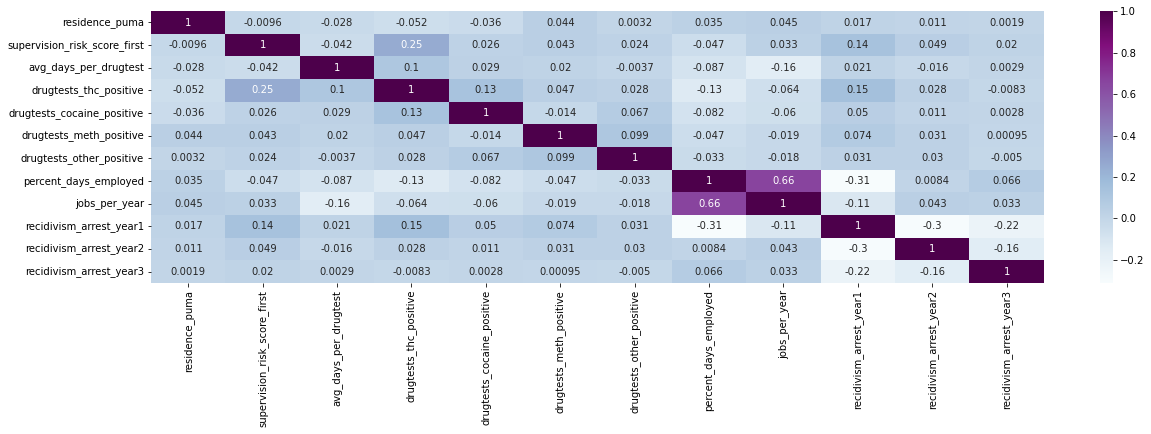

In [31]:
plt.figure(figsize = (20, 5))
sns.heatmap(recid_df[['residence_puma', 'supervision_risk_score_first', 'avg_days_per_drugtest', 'drugtests_thc_positive', 
                      'drugtests_cocaine_positive', 'drugtests_meth_positive', 'drugtests_other_positive', 
                      'percent_days_employed', 'jobs_per_year', 'recidivism_arrest_year1', 'recidivism_arrest_year2', 
                      'recidivism_arrest_year3']].corr(), cmap = 'BuPu', annot = True);

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

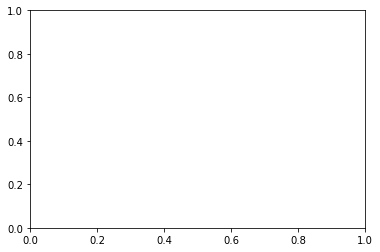

In [186]:

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.line(recid_df['jobs_per_year'], recid_df['recidivism_arrest_year1'], label = "Y1")

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.line(recid_df['jobs_per_year'], recid_df['recidivism_arrest_year2'], label = "Y2")

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.line(recid_df['jobs_per_year'], recid_df['recidivism_arrest_year3'], label = "Y3")

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.bar(recid_df['jobs_per_year'], recid_df['recidivism_within_3years'], label = "Recid")
plt.legend();

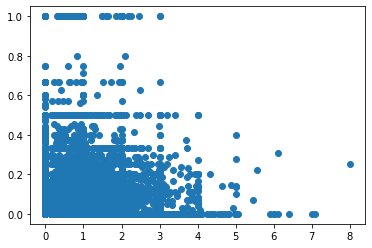

In [36]:

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.scatter(recid_df['jobs_per_year'], recid_df['drugtests_thc_positive']);

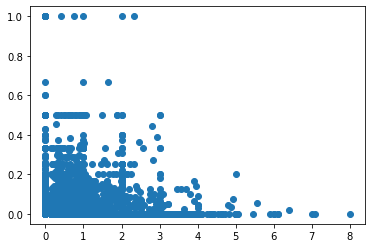

In [37]:

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.scatter(recid_df['jobs_per_year'], recid_df['drugtests_cocaine_positive']);

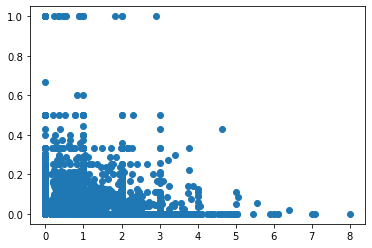

In [38]:

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.scatter(recid_df['jobs_per_year'], recid_df['drugtests_meth_positive']);

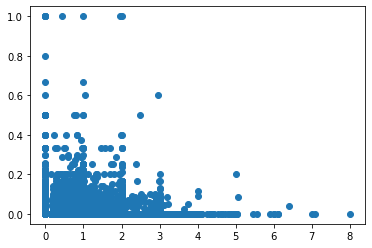

In [39]:

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.scatter(recid_df['jobs_per_year'], recid_df['drugtests_other_positive']);